In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import string
import re
import nltk

from wordcloud import WordCloud,STOPWORDS
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import collections
pl.rc('figure',figsize=(20,11))

from scipy.stats import zscore

from nltk.corpus import stopwords
import keras

In [2]:
df=pd.read_csv('AB_US_2020.csv')

c:\users\rissu\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [4]:
def RMSE(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [5]:
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    os.environ['TF_DETERMINISTIC_OPS']='1'
set_seed()

In [6]:
df.drop(columns=['host_id','host_name','neighbourhood_group','neighbourhood'],inplace=True)

In [7]:
df.head()

,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


<AxesSubplot:>

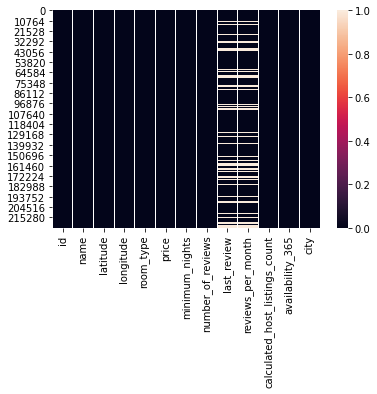

In [8]:
sns.heatmap(df.isnull())

In [9]:
print("Percentage of null values")
round(df.isna().sum()/len(df),2)

Percentage of null values


id                                0.00
name                              0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       0.22
reviews_per_month                 0.22
calculated_host_listings_count    0.00
availability_365                  0.00
city                              0.00
dtype: float64

In [10]:
df.dtypes

id                                  int64
name                               object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
city                               object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   latitude                        226030 non-null  float64
 3   longitude                       226030 non-null  float64
 4   room_type                       226030 non-null  object 
 5   price                           226030 non-null  int64  
 6   minimum_nights                  226030 non-null  int64  
 7   number_of_reviews               226030 non-null  int64  
 8   last_review                     177428 non-null  object 
 9   reviews_per_month               177428 non-null  float64
 10  calculated_host_listings_count  226030 non-null  int64  
 11  availability_365                226030 non-null  int64  
 12  city            

In [12]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000
mean,2.547176e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.43145,16.698562,159.314856
std,1.317814e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.68321,51.068966,140.179628
min,1.090000e+02,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.01000,1.000000,0.000000
25%,1.515890e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.23000,1.000000,0.000000
50%,2.590916e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.81000,2.000000,140.000000
75%,3.772624e+07,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,2.06000,6.000000,311.000000
max,4.556085e+07,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.06000,593.000000,365.000000


In [13]:
numeric_features=[col for col in df.columns if df[col].dtypes!='O']
numeric_features


['id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [14]:
del numeric_features[0]
numeric_features

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [15]:
categoric_features=[col for col in df.columns if df[col].dtypes=='O']
categoric_features

['name', 'room_type', 'last_review', 'city']

In [16]:
del categoric_features[2]

In [17]:
categoric_features

['name', 'room_type', 'city']

In [18]:
df.isna().sum()


id                                    0
name                                 28
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       48602
reviews_per_month                 48602
calculated_host_listings_count        0
availability_365                      0
city                                  0
dtype: int64

In [19]:
df.shape

(226030, 13)

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(177417, 13)

In [22]:
df.isna().sum()

id                                0
name                              0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
dtype: int64

In [23]:
df.head()

,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


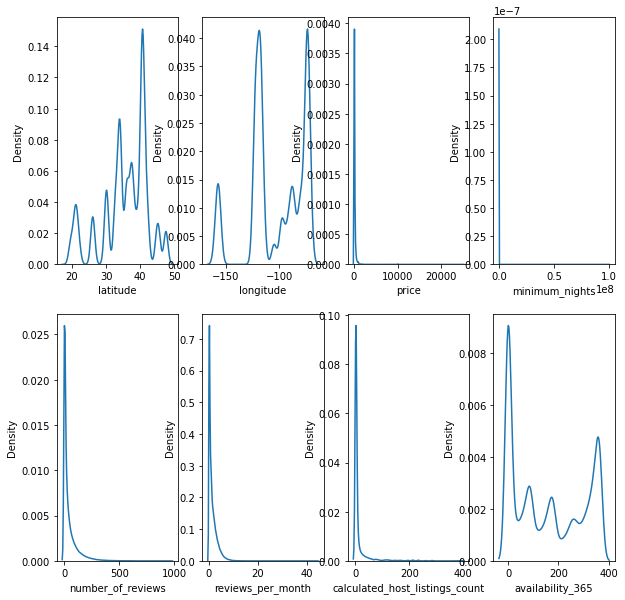

In [24]:
fig,axes=pl.subplots(2,4,figsize=(10,10))
aux=0
for row in axes:
    for col in row:
        sns.kdeplot(df[numeric_features[aux]],ax=col)
        aux+=1

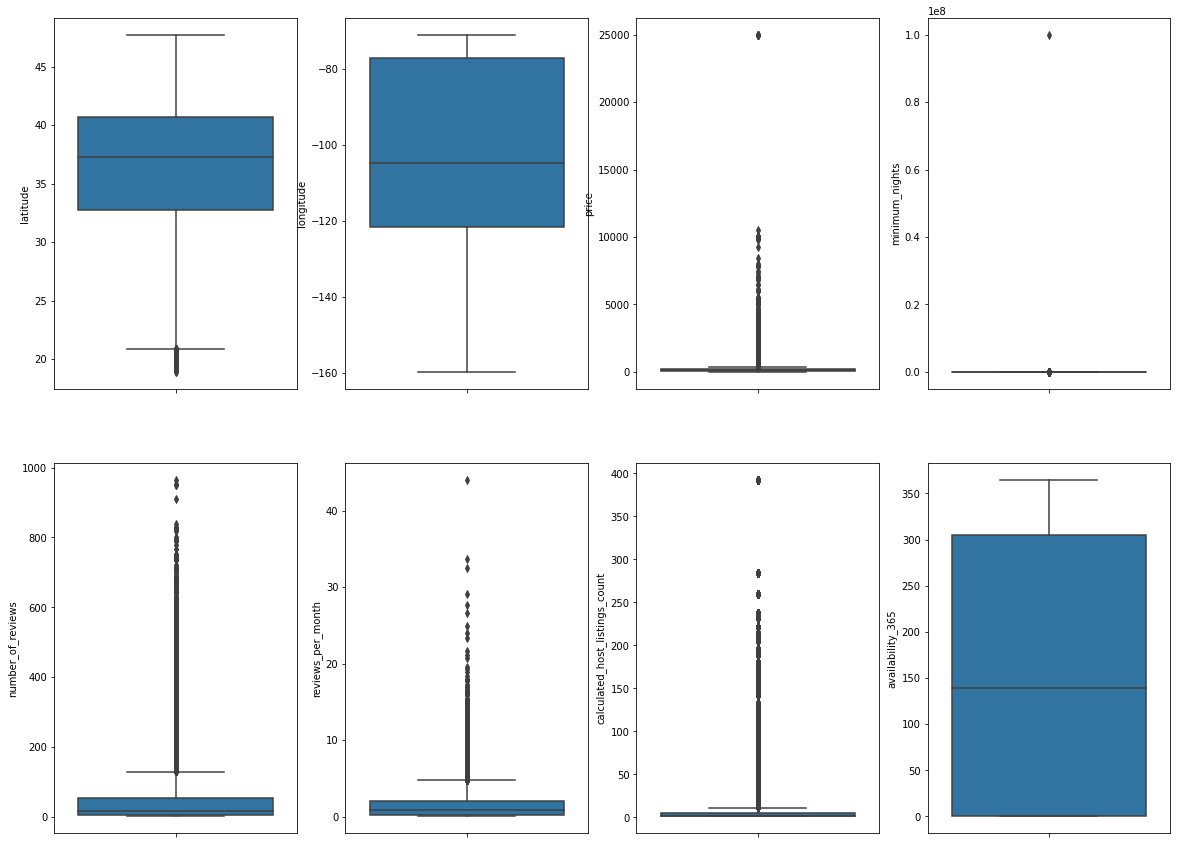

In [25]:
fig,axes=pl.subplots(2,4)
fig.set_figheight(15)
fig.set_figwidth(20)
ax=axes.ravel()
for i,row in enumerate(ax):
    sns.boxplot(y=df[numeric_features[i]],ax=row)


In [26]:
lower_bound=.25
upper_bound=.75
iqr=df[df['price'].between(df['price'].quantile(lower_bound),df['price'].quantile(upper_bound),inclusive=True)]


In [27]:
temp=pd.DataFrame(np.random.randint(1,10,(10,10)),columns=['a','b','c','d','e','f','g','h','i','j'])
temp

,a,b,c,d,e,f,g,h,i,j
0,8,4,6,9,3,7,7,4,6,7
1,1,1,9,4,7,2,7,9,6,2
2,5,7,3,8,3,3,4,4,9,4
3,5,9,4,9,3,1,1,5,5,8
4,3,7,7,1,3,7,7,2,2,5
5,3,3,9,1,8,6,5,9,4,9
6,4,9,6,8,8,2,5,6,8,7
7,5,5,7,5,3,6,6,6,9,5
8,2,2,3,2,9,6,4,6,2,9
9,1,4,9,1,3,3,5,7,3,1


In [28]:
temp['a'].between(1,2)

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
Name: a, dtype: bool

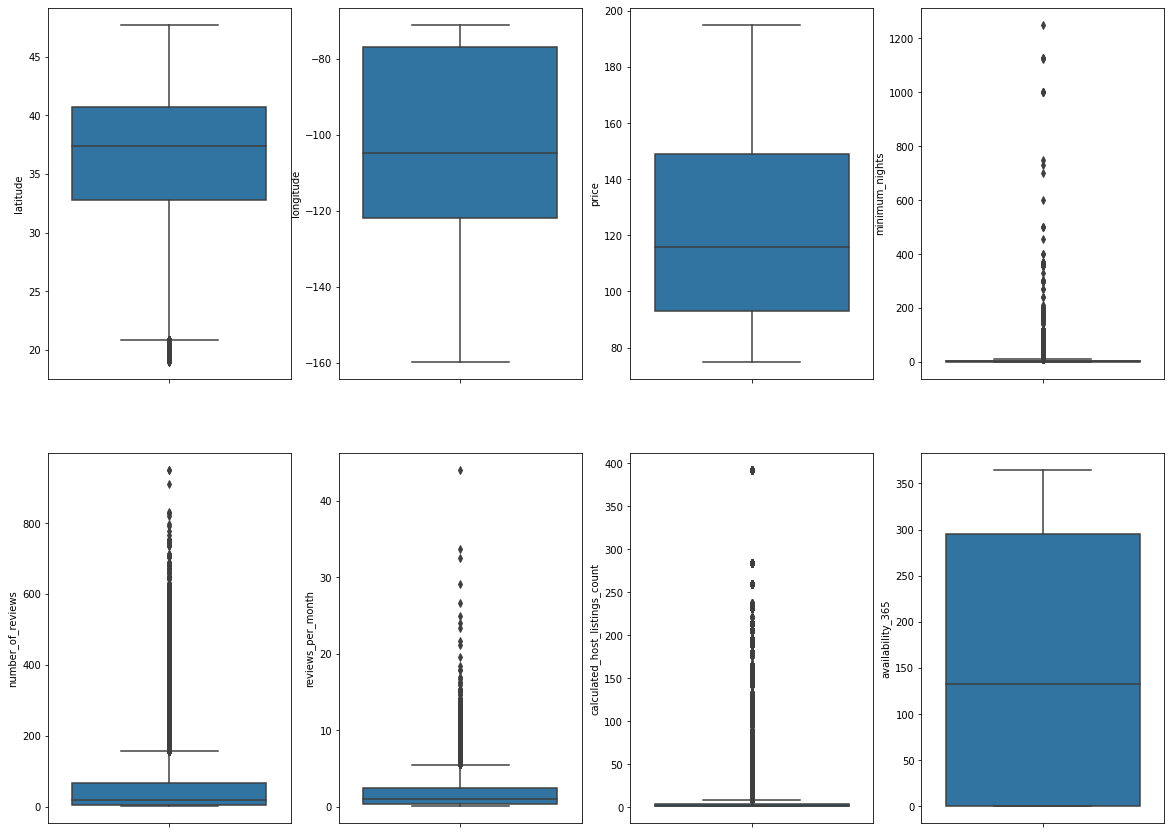

In [29]:
fig,axes=pl.subplots(2,4)
fig.set_figheight(15)
fig.set_figwidth(20)
ax=axes.ravel()
for i,row in enumerate(ax):
    sns.boxplot(y=iqr[numeric_features[i]],ax=row)


In [31]:
iqr.shape,df.shape


((89588, 13), (177417, 13))

In [35]:
iqr=iqr[iqr['number_of_reviews']>0]
iqr=iqr[iqr['calculated_host_listings_count']<10]
iqr=iqr[iqr['number_of_reviews']<200]
iqr=iqr[iqr['minimum_nights']<10]
iqr=iqr[iqr['reviews_per_month']<5]

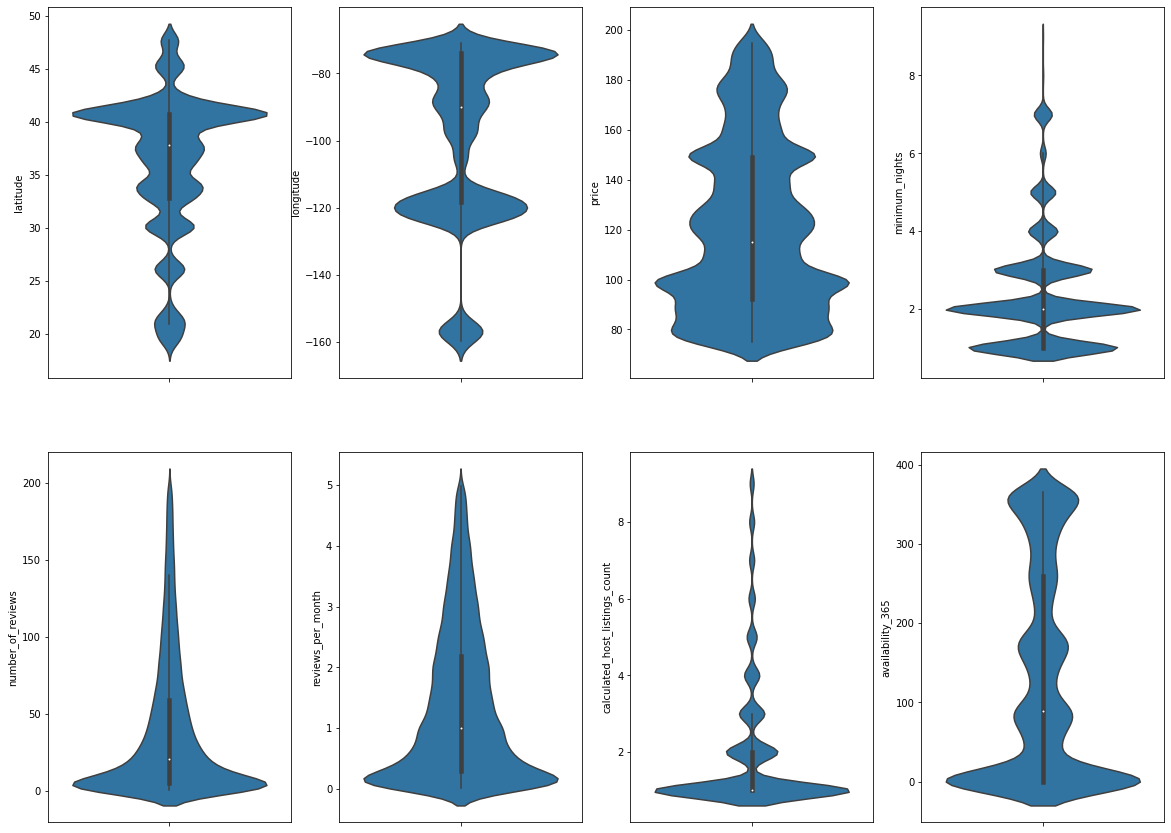

In [36]:
fig,axes=pl.subplots(2,4)
fig.set_figheight(15)
fig.set_figwidth(20)
axes=axes.ravel()
for i,ax in enumerate(axes):
    sns.violinplot(y=iqr[numeric_features[i]],ax=ax)

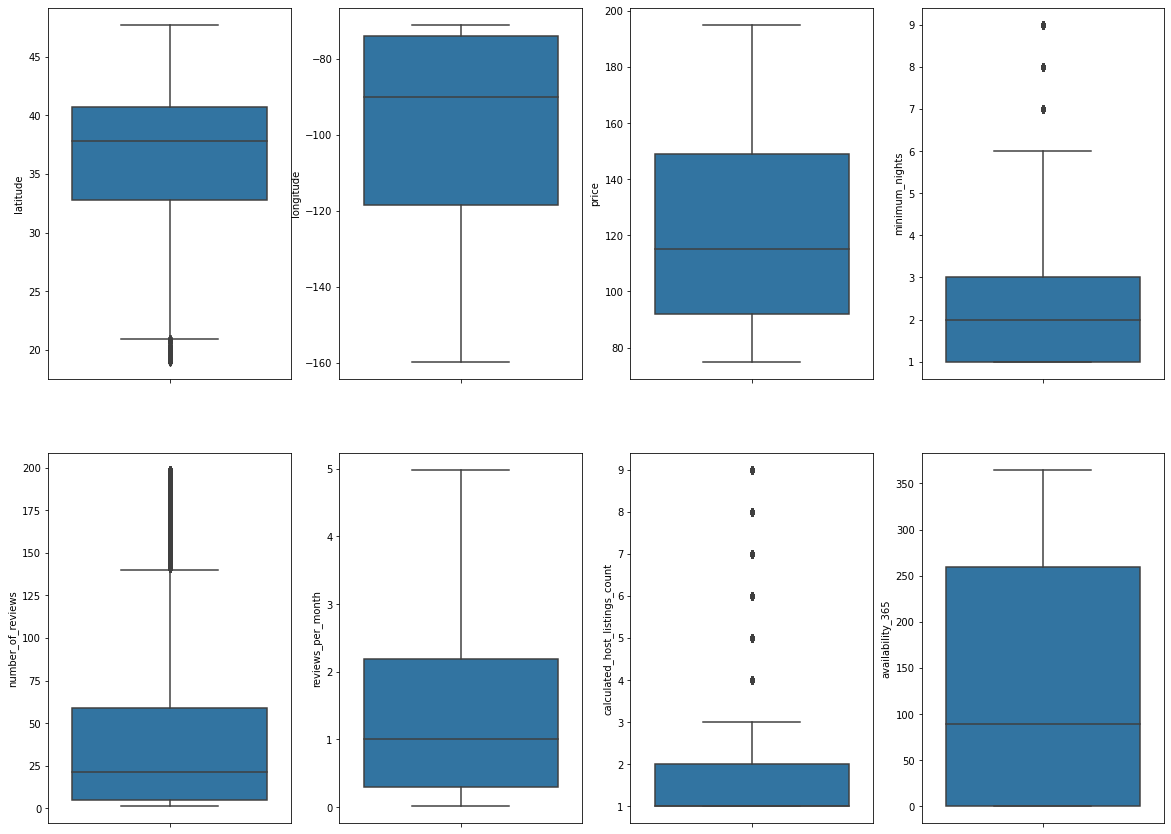

In [37]:
fig,axes=pl.subplots(2,4)
fig.set_figheight(15)
fig.set_figwidth(20)
axes=axes.ravel()
for i,ax in enumerate(axes):
    sns.boxplot(y=iqr[numeric_features[i]],ax=ax)

In [62]:
df1=df[numeric_features].copy()
z_scores=zscore(df1)
abs_z_scores=np.abs(z_scores)
filtered_entries=(abs_z_scores<3).all(axis=1)
new_df=df1[filtered_entries].copy()
new_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,35.65146,-82.62792,60,1,138,1.14,1,0
1,35.59779,-82.55540,470,1,114,1.03,11,288
2,35.60670,-82.55563,75,30,89,0.81,2,298
4,35.61442,-82.54127,125,30,58,0.52,1,0
5,35.61856,-82.55276,134,7,54,0.49,1,294


In [63]:
df.shape,new_df.shape

((177417, 13), (166110, 8))

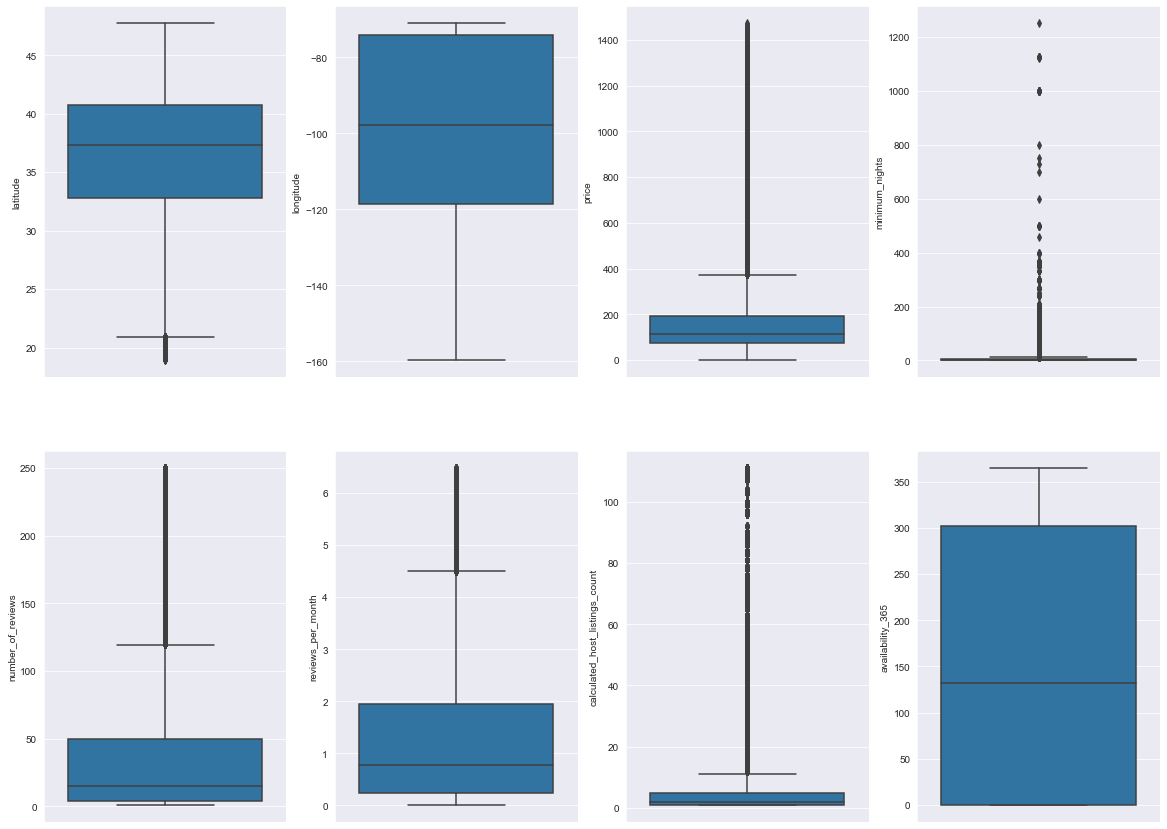

In [64]:
fig,axes=pl.subplots(2,4)
fig.set_figheight(15)
fig.set_figwidth(20)
axes=axes.ravel()
for i,ax in enumerate(axes):
    sns.boxplot(y=new_df[numeric_features[i]],ax=ax)